## Фаза 1. Неделя 1. Вторник
### Проверка статистических гипотез

In [1]:
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 1. Задача с кофе

### 1.1 Поэтапное решение

* Подгрузим выборку 

In [2]:
data = pd.read_csv('aux/coffee_data.csv', index_col='buyer_id')

data.head()

,purchase_status
buyer_id,
1,0
2,1
3,0
4,1
5,1


* Из 300 человек, купили 167

In [3]:
data['purchase_status'].value_counts() 

purchase_status
1    167
0    133
Name: count, dtype: int64

#### 1. Проверяем гипотезу о том, что конверсия в покупку в выборке больше 0.5

$H_0$: $p = 0.5$  

$H_1$: $p > 0.5$


#### 2. Выбор статистики и распределения статистики

$\vec{x}= (x_1,x_2,x_3, ..., x_{300})$ - выборка

В роли статистики(метрики) возьмем количество купивших $T(\overline{X}) = \sum_{i = 1} ^ {300} x_i$ - Которая имеет биномиальное расрпеделение
 

$\overline{X} \sim \mathbb{N} (\mu, \dfrac{\sigma}{\sqrt{n}})$.


In [4]:
t_stat = data['purchase_status'].to_numpy().sum() # Значения статистики

In [5]:
distribution_of_purchased_coffee = st.binom(300, 0.5) # Распределение статистики

#### 3. Зададим уровень значимости (alpha)

In [6]:
alpha = 0.05


#### 4. Построим промежуточный график и отобразим на нем наше значение среднего по выборке

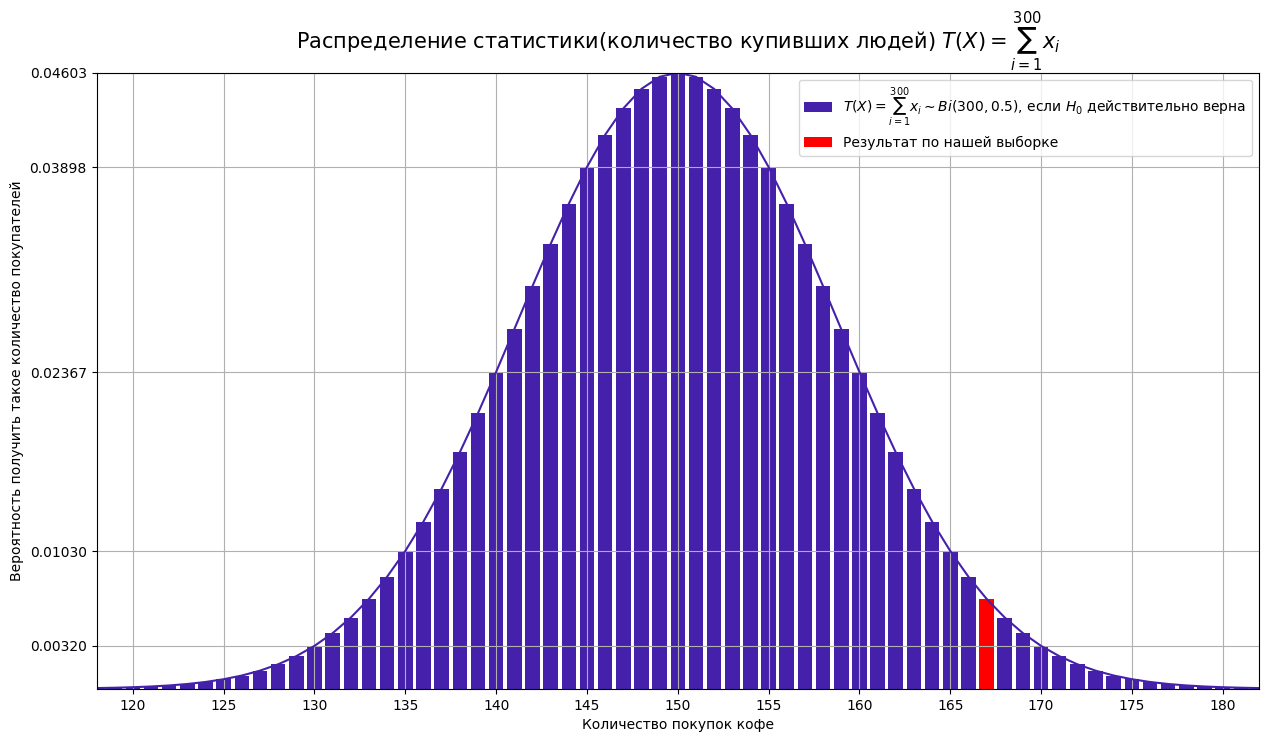

In [7]:
x = np.arange(118, 192)

plt.figure(figsize=(15, 8))

plt.plot(x, distribution_of_purchased_coffee.pmf(x), color='#4520ab')
plt.bar(x, distribution_of_purchased_coffee.pmf(x), color='#4520ab', label=r'$T(X) = \sum_{i=1}^{300}x_i \sim Bi(300, 0.5)$, если $H_0$ действительно верна')
plt.bar(167, distribution_of_purchased_coffee.pmf(t_stat), color='r', label='Результат по нашей выборке')
plt.xlabel('Количество покупок кофе')
plt.ylabel('Вероятность получить такое количество покупателей')
plt.title(r'Распределение статистики(количество купивших людей) $T(X) = \sum_{i=1}^{300}x_i$', size=15)
plt.grid()
plt.xlim((118, 182))
plt.ylim((0, distribution_of_purchased_coffee.pmf(150)))
plt.xticks(np.arange(120, 185, 5))
plt.yticks(distribution_of_purchased_coffee.pmf([130, 135, 140, 145, 150]))
plt.legend();

#### 5. Построение критической границы

In [8]:
t_crit = distribution_of_purchased_coffee.ppf(1 - alpha)
print(t_crit)  

164.0


#### 6. p-value и принятие решения

In [9]:
t_stat

np.int64(167)

In [20]:
p_value = 1 - distribution_of_purchased_coffee.cdf(t_stat)
p_value

np.float64(0.02156424963861081)

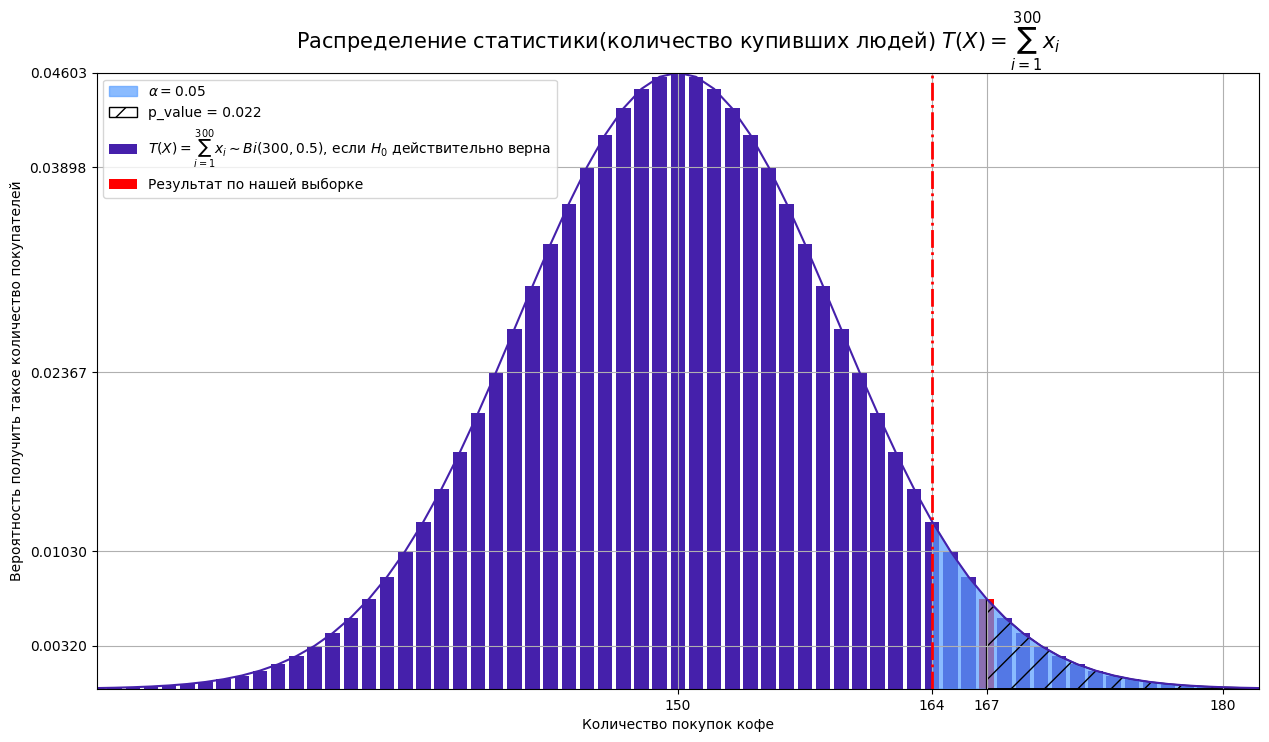

In [11]:
x = np.arange(118, 192)

plt.figure(figsize=(15, 8))

plt.plot(x, distribution_of_purchased_coffee.pmf(x), color='#4520ab')
plt.bar(x, distribution_of_purchased_coffee.pmf(x), color='#4520ab', label=r'$T(X) = \sum_{i=1}^{300}x_i \sim Bi(300, 0.5)$, если $H_0$ действительно верна')
plt.bar(167, distribution_of_purchased_coffee.pmf(t_stat), color='r', label='Результат по нашей выборке')
plt.xlabel('Количество покупок кофе')
plt.ylabel('Вероятность получить такое количество покупателей')
plt.title(r'Распределение статистики(количество купивших людей) $T(X) = \sum_{i=1}^{300}x_i$', size=15)
plt.grid()
plt.xlim((118, 182))
plt.ylim((0, distribution_of_purchased_coffee.pmf(150)))

plt.xticks([150, t_crit, t_stat, 180])
plt.yticks(distribution_of_purchased_coffee.pmf([130, 135, 140, 145, 150]))



plt.axvline(t_crit, color='r', linestyle='-.', linewidth=2)


# x = np.linspace(118, 182, 1000)
# Закрасить область справа от вертикальной линии
plt.fill_between(x, distribution_of_purchased_coffee.pmf(x), color='#599FFF', alpha=0.7, where=(x >= t_crit), label = r'$\alpha = 0.05$')

plt.fill_between(
    x, 
    distribution_of_purchased_coffee.pmf(x), 
    color='none', 
    edgecolor='k',
    alpha=1, 
    where=(x >= t_stat), 
    hatch='/', 
    label = f'p_value = {np.round(1 - distribution_of_purchased_coffee.cdf(t_stat), 3)}'
    )


plt.legend();

#### 7. Принятие решения 

In [39]:
if p_value > alpha:
    print('гипотезу H0 принимаем')
else:
    print('гипотнзу H1 принимаем')


# ИЛИ 


if t_stat > t_crit:
    print('H1')
else:
    print('H0')

гипотнзу H1 принимаем
H1


### 1.2 Можно воспользвоаться готовым решением для гипотезы о доле. 

In [50]:
from scipy import stats

# Проведем правосторонний биномиальный тест
# Количество успехов (покупок) = 167
# Общее количество испытаний = 300
# Проверяем гипотезу p = 0.5
# H0: p = 0.5
# H1: p > 0.5

result = stats.binomtest(167, n=300, p=0.5, alternative='greater')
print(f"p-value правостороннего биномиального теста: {result.pvalue}")

p-value правостороннего биномиального теста: 0.028282825627145427


### 1.3 Доверительный интервал

In [56]:
# Построим доверительный интервал для количества покупателей
from scipy import stats

# Количество успехов (покупок) = 167
# Общее количество наблюдений = 300
n_success = 167
n_total = 300

# Задаем уровень доверительности 95%
confidence_level = 1 - alpha

# Вычисляем доверительный интервал для доли
confidence_interval = stats.binomtest(n_success, n_total).proportion_ci(confidence_level=confidence_level)

# Переводим доверительный интервал в абсолютные значения
absolute_ci_low = confidence_interval.low * n_total
absolute_ci_high = confidence_interval.high * n_total

delta = absolute_ci_high - absolute_ci_low

print(f"{confidence_level*100}% доверительный интервал для количества покупателей в ГС: 167 ± {delta/2:.0f}")
print(f"То есть: ({absolute_ci_low:.0f}, {absolute_ci_high:.0f})")


95.0% доверительный интервал для количества покупателей в ГС: 167 ± 17
То есть: (150, 184)


## 2 Среднее время доставки сервиса

### 2.1 Поэтапное решение

* Есть сервис по доставке еды, который заявляет, что среднее время их доставки составляет 20 минут

* Мы подняли все наши заказы у данного сервиса

In [52]:
sample = np.array(
    [10, 13, 18, 8, 14, 15, 14, 15, 10, 14, 21, 20, 18, 13, 10, 13, 11, 10, 21, 16, 18, 21, 22, 20, 25, 14, 12, 14, 11, 16, 30, \
     29, 30, 31, 28, 28, 24, 48, 35, 50, 13, 8, 1, 12, 33, 27, 28, 44, 22, 23, 28, 23, 22, 10,27, 30, 30, 41, 26, 29, 35, 28, 27,\
     22, 25, 33, 28, 7, 19, 15, 20, 36, 22, 17, 17, 29, 14, 31, 11, 6, 24, 13, 15 ,21, 30, 26, 9, 21, 13, 16, 29, 17, 26, 15, 21,\
     24, 12, 27, 18, 32, 33, 47, 23, 33, 17, 19, 25, 15, 14, 20, 23, 13, 44, 33, 48, 34, 34, 28, 27, 21, 26, 14, 11, 1
     ]
)

$H_0: \mu = 20$  
$H_1: \mu > 20$  

In [53]:
t_stat = sample.mean() # Значения статистики
t_stat

np.float64(21.943548387096776)

$\overline{X} = \dfrac{1}{n}\sum_{i = 1} ^ {n} x_i$ - Выборочное среднее  

По центральной предельной теореме, выборочное среднее имеет нормальное распределение со следующими параметрами  


$\overline{X} \sim \mathbb{N} (\mu, \dfrac{\sigma}{\sqrt{n}})$.


In [59]:
mu = 20
n = len(sample)
sigma = sample.std(ddof=1) # Стандартное отклонение одного заказа


se = sigma / np.sqrt(n) # Стандартное отклоенение именного среднего по нашим заказам

In [60]:
t_stat_distr = st.norm(mu, se) # Распределение нашей статистики(выборочное среднее)

In [61]:
alpha = 0.05 # Уровень значимости

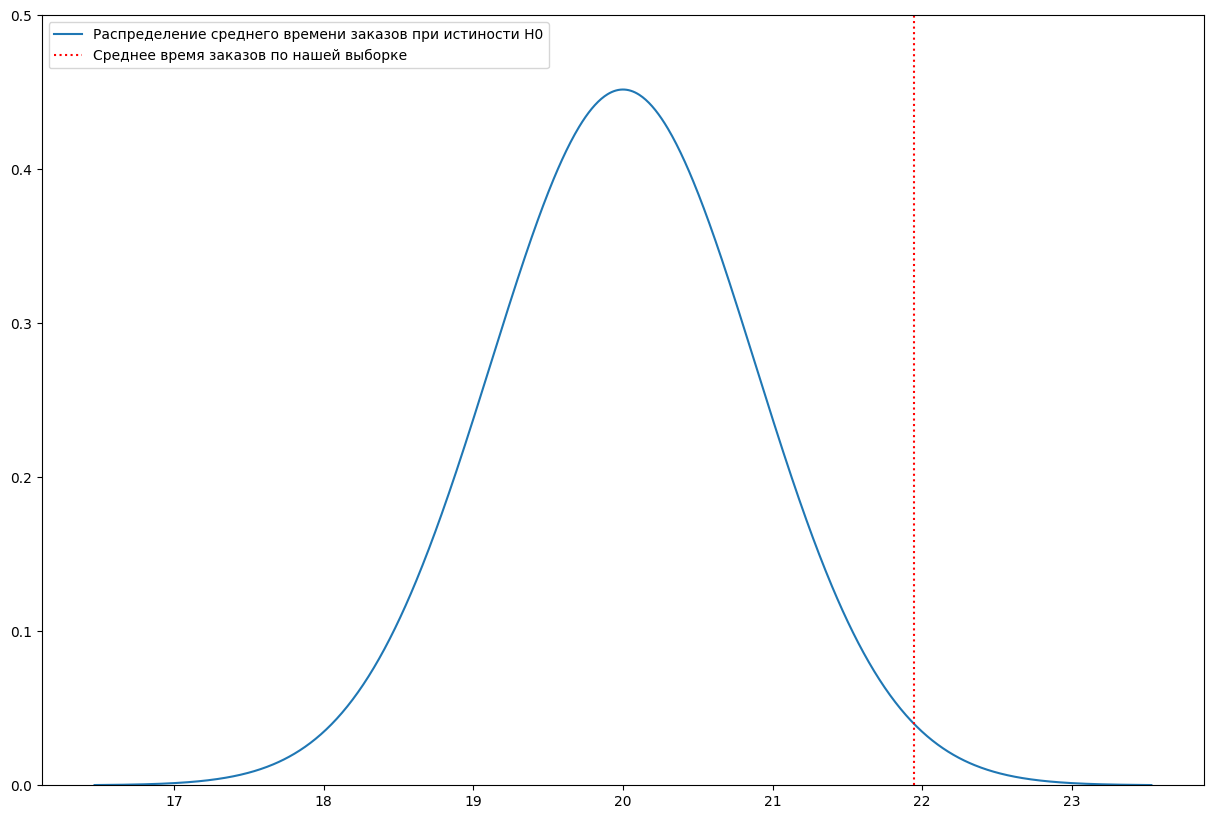

In [62]:
plt.figure(figsize=(15, 10))

x = np.linspace(mu - 4 * se, mu + 4 * se, 1000) # Генерация оси x 


plt.plot(x, t_stat_distr.pdf(x), label='Распределение среднего времени заказов при истиности H0')
plt.axvline(t_stat, color='r', linestyle=':', label='Среднее время заказов по нашей выборке')
plt.ylim(0, 0.5)
plt.legend();

In [63]:
t_crit = t_stat_distr.ppf(1 - alpha) # Критическая граница принятия решения
t_crit

np.float64(21.452453885815956)

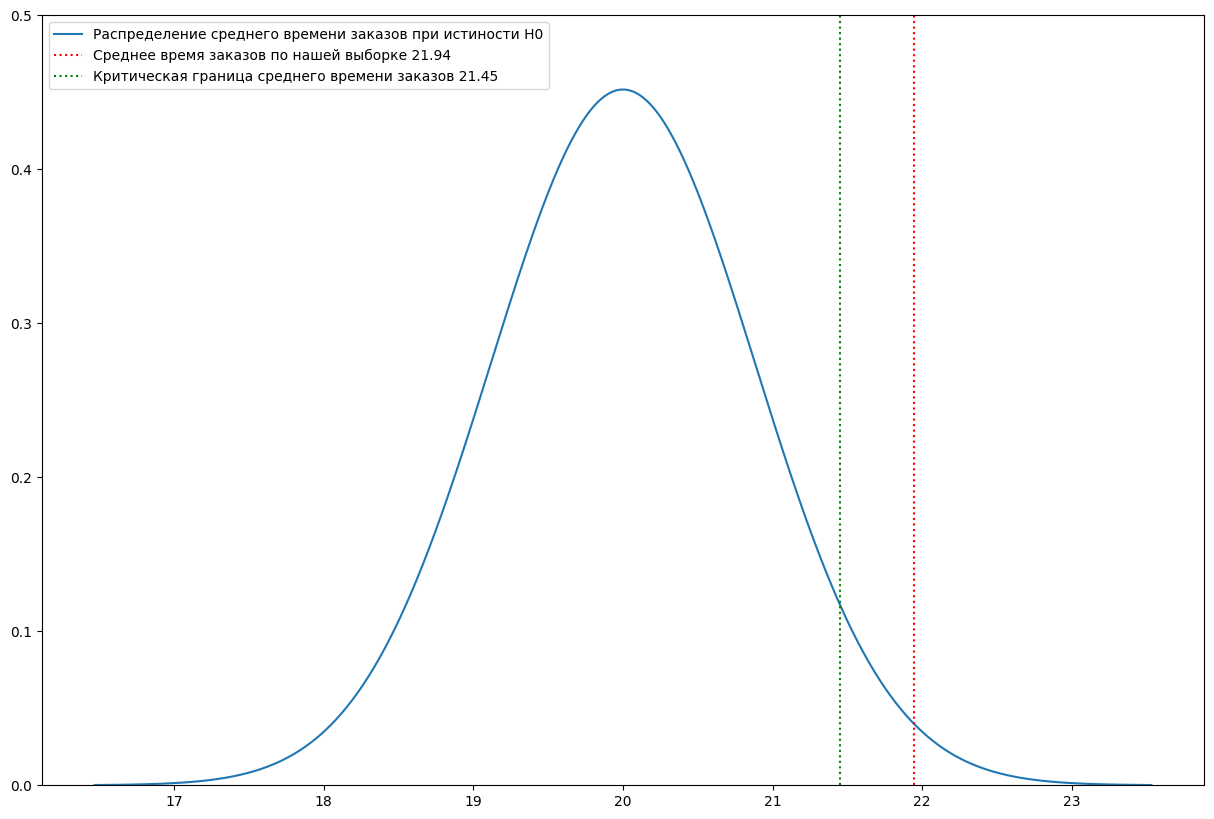

In [78]:
plt.figure(figsize=(15, 10))

x = np.linspace(mu - 4 * se, mu + 4 * se, 1000) # Генерация оси x 


plt.plot(x, t_stat_distr.pdf(x), label='Распределение среднего времени заказов при истиности H0')
plt.axvline(t_stat, color='r', linestyle=':', label=f'Среднее время заказов по нашей выборке {t_stat:.2f}')
plt.axvline(t_crit, color='g', linestyle=':', label=f'Критическая граница среднего времени заказов {t_crit:.2f}')
plt.ylim(0, 0.5)
plt.legend();

In [65]:
p_value = 1 - t_stat_distr.cdf(t_stat)
p_value

np.float64(0.013867972659856509)

In [66]:
if p_value > alpha:
    print('H0')
else:
    print('H1')

H1


### 2.2 Можно воспользоваться готовым решением(ttest)

In [82]:
st.ttest_1samp(sample, 20, alternative='greater')

TtestResult(statistic=np.float64(2.201001109151148), pvalue=np.float64(0.01480127146426336), df=np.int64(123))

### 2.3 Доверительный интервал через bootstrap

In [76]:
# Построим доверительный интервал для среднего через bootstrap

bootstrap_means = []


n_bootstrap = 1000000


for _ in range(n_bootstrap):
    # Генерируем случайную выборку с возвращением того же размера
    bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
    # Вычисляем среднее для этой выборки
    bootstrap_means.append(np.mean(bootstrap_sample))

# Вычисляем границы доверительного интервала (95%)
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

print(f"Доверительный интервал для среднего через numpy (95%): [{confidence_interval[0]:.2f}, {confidence_interval[1]:.2f}]")

Доверительный интервал для среднего через numpy (95%): [20.24, 23.69]


#### 2.4 Можно так же воспользоваться готовым решением из `scipy`

In [75]:
# Построим доверительный интервал через scipy bootstrap
from scipy import stats

n_bootstrap = 1000000

# Вычисляем доверительный интервал через scipy
scipy_ci = stats.bootstrap((sample,), np.mean, n_resamples=n_bootstrap, 
                         confidence_level=0.95)

print(f"\nДоверительный интервал для среднего через scipy (95%): [{scipy_ci.confidence_interval.low:.2f}, {scipy_ci.confidence_interval.high:.2f}]")


Доверительный интервал для среднего через scipy (95%): [20.28, 23.73]
